# SIMPLE LINEAR REGRESSION AND ML IMPLEMENTATION

By Jeevitha Lokanath


In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [8]:
import os
os.getcwd()

'e:\\endproject\\bostonhouse'

# Lets load the Boston House pricing Dataset

In [7]:
from sklearn.datasets import load_boston

In [8]:
boston = load_boston()


e:\endproject\bostonhouse\venv\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dat

In [9]:
boston.keys()


dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename', 'data_module'])

#Lets check the description of the dataset


In [12]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [10]:
print(boston.data)

[[6.3200e-03 1.8000e+01 2.3100e+00 ... 1.5300e+01 3.9690e+02 4.9800e+00]
 [2.7310e-02 0.0000e+00 7.0700e+00 ... 1.7800e+01 3.9690e+02 9.1400e+00]
 [2.7290e-02 0.0000e+00 7.0700e+00 ... 1.7800e+01 3.9283e+02 4.0300e+00]
 ...
 [6.0760e-02 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9690e+02 5.6400e+00]
 [1.0959e-01 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9345e+02 6.4800e+00]
 [4.7410e-02 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9690e+02 7.8800e+00]]


In [11]:
print(boston.target)

[24.  21.6 34.7 33.4 36.2 28.7 22.9 27.1 16.5 18.9 15.  18.9 21.7 20.4
 18.2 19.9 23.1 17.5 20.2 18.2 13.6 19.6 15.2 14.5 15.6 13.9 16.6 14.8
 18.4 21.  12.7 14.5 13.2 13.1 13.5 18.9 20.  21.  24.7 30.8 34.9 26.6
 25.3 24.7 21.2 19.3 20.  16.6 14.4 19.4 19.7 20.5 25.  23.4 18.9 35.4
 24.7 31.6 23.3 19.6 18.7 16.  22.2 25.  33.  23.5 19.4 22.  17.4 20.9
 24.2 21.7 22.8 23.4 24.1 21.4 20.  20.8 21.2 20.3 28.  23.9 24.8 22.9
 23.9 26.6 22.5 22.2 23.6 28.7 22.6 22.  22.9 25.  20.6 28.4 21.4 38.7
 43.8 33.2 27.5 26.5 18.6 19.3 20.1 19.5 19.5 20.4 19.8 19.4 21.7 22.8
 18.8 18.7 18.5 18.3 21.2 19.2 20.4 19.3 22.  20.3 20.5 17.3 18.8 21.4
 15.7 16.2 18.  14.3 19.2 19.6 23.  18.4 15.6 18.1 17.4 17.1 13.3 17.8
 14.  14.4 13.4 15.6 11.8 13.8 15.6 14.6 17.8 15.4 21.5 19.6 15.3 19.4
 17.  15.6 13.1 41.3 24.3 23.3 27.  50.  50.  50.  22.7 25.  50.  23.8
 23.8 22.3 17.4 19.1 23.1 23.6 22.6 29.4 23.2 24.6 29.9 37.2 39.8 36.2
 37.9 32.5 26.4 29.6 50.  32.  29.8 34.9 37.  30.5 36.4 31.1 29.1 50.
 33.3 3

In [12]:
print(boston.feature_names)

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


# Preparing the Dataset

In [13]:
dataset=pd.DataFrame(boston.data,columns=boston.feature_names)

In [14]:
dataset.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [15]:
dataset['price']=boston.target

In [16]:
dataset.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [17]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  price    506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [21]:
# Summarizing the dataset

In [18]:
dataset.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,price
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [19]:
## check the missing values
dataset.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
price      0
dtype: int64

In [20]:
###exploratory Data Analysis
## Correlation
dataset.corr()


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,price
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


In [1]:
import seaborn as sns
sns.pairplot(dataset)

ModuleNotFoundError: No module named 'seaborn'

Text(0, 0.5, 'price')

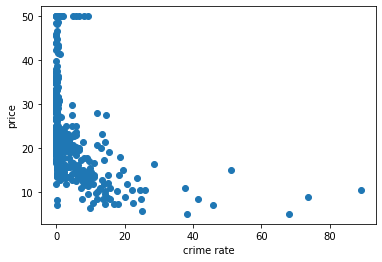

In [ ]:
plt.scatter(dataset['CRIM'],dataset['price'])
plt.xlabel('crime rate')
plt.ylabel('price')

We can observe that the prices of the houses are high when the crim rate is low.
Similarly let is learn to the relation ship between the price and RM(avg no of rooms) feature below.

Text(0, 0.5, 'price')

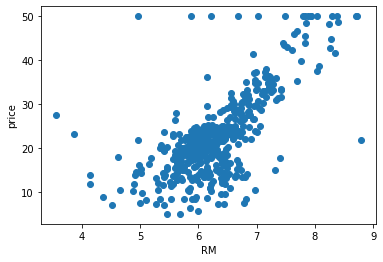

In [ ]:
plt.scatter(dataset['RM'],dataset['price'])
plt.xlabel('RM')
plt.ylabel('price')

In [ ]:
# Let us create a regression plot for these features using seaborn module


<AxesSubplot:xlabel='RM', ylabel='price'>

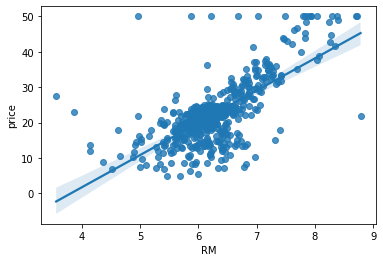

In [ ]:
sns.regplot(x='RM',y='price',data=dataset)

In [ ]:
# As the number of rooms increase the house prices increase from the above plot

In [ ]:
#Another feature which can be observed that is highly correlated in the corr() is LSTAT. 
#Let us try to create a regplot for the same

<AxesSubplot:xlabel='LSTAT', ylabel='price'>

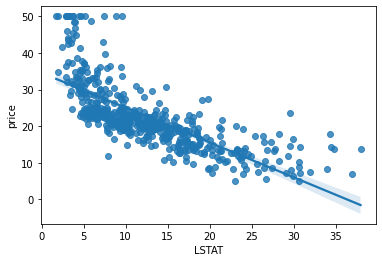

In [ ]:
sns.regplot(x='LSTAT',y='price',data=dataset)

In [ ]:
# We can observe the negative correlation in the above graph as 
#LSTAT value increases the house price decreases

In [ ]:
# Independent and dependent features
X=dataset.iloc[:,:-1]
y=dataset.iloc[:,-1]

In [ ]:
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [ ]:
y.head()

0    24.0
1    21.6
2    34.7
3    33.4
4    36.2
Name: price, dtype: float64

In [4]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=25)

NameError: name 'X' is not defined

In [ ]:
X_train.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
260,0.54011,20.0,3.97,0.0,0.647,7.203,81.8,2.1121,5.0,264.0,13.0,392.80,9.59
19,0.72580,0.0,8.14,0.0,0.538,5.727,69.5,3.7965,4.0,307.0,21.0,390.95,11.28
30,1.13081,0.0,8.14,0.0,0.538,5.713,94.1,4.2330,4.0,307.0,21.0,360.17,22.60
102,0.22876,0.0,8.56,0.0,0.520,6.405,85.4,2.7147,5.0,384.0,20.9,70.80,10.63
290,0.03502,80.0,4.95,0.0,0.411,6.861,27.9,5.1167,4.0,245.0,19.2,396.90,3.33


In [ ]:
X_test

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
125,0.16902,0.0,25.65,0.0,0.581,5.986,88.4,1.9929,2.0,188.0,19.1,385.02,14.81
486,5.69175,0.0,18.10,0.0,0.583,6.114,79.8,3.5459,24.0,666.0,20.2,392.68,14.98
324,0.34109,0.0,7.38,0.0,0.493,6.415,40.1,4.7211,5.0,287.0,19.6,396.90,6.12
386,24.39380,0.0,18.10,0.0,0.700,4.652,100.0,1.4672,24.0,666.0,20.2,396.90,28.28
459,6.80117,0.0,18.10,0.0,0.713,6.081,84.4,2.7175,24.0,666.0,20.2,396.90,14.70
...,...,...,...,...,...,...,...,...,...,...,...,...,...
84,0.05059,0.0,4.49,0.0,0.449,6.389,48.0,4.7794,3.0,247.0,18.5,396.90,9.62
307,0.04932,33.0,2.18,0.0,0.472,6.849,70.3,3.1827,7.0,222.0,18.4,396.90,7.53
173,0.09178,0.0,4.05,0.0,0.510,6.416,84.1,2.6463,5.0,296.0,16.6,395.50,9.04
56,0.02055,85.0,0.74,0.0,0.410,6.383,35.7,9.1876,2.0,313.0,17.3,396.90,5.77


#Lets's standardize the independent features
#Scaling of Features is an essential step in modeling the algorithms with the datasets.In order to reach the global minima(convergence) as internally we are using the gradient descent.
#Standardization is a scaling technique wherein it makes the data scale-free by converting the statistical distribution of the data into the below format:

mean - 0 (zero)
standard deviation - 1
z=x-Mu/sigma

In [2]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [3]:
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

NameError: name 'X_train' is not defined

In [1]:
import pickle
pickle.dump(scaler,open('scaling.pkl','wb'))

NameError: name 'scaler' is not defined

# MODEL TRAINING

In [ ]:
from sklearn.linear_model import LinearRegression 


In [ ]:
regression = LinearRegression()

In [ ]:
regression.fit(X_train,y_train)

LinearRegression()

In [ ]:
#print the regression coefficients
print(regression.coef_)

[-1.01301144  1.23257682  0.1842775   0.16865064 -2.26699235  2.91392886
 -0.13758336 -3.35861543  3.18981624 -2.78169324 -2.25501798  0.65028788
 -3.42084778]


In [ ]:
# print the regression intercept
print(regression.intercept_)


22.586723163841803


In [ ]:
# print the regression parameters
print(regression.get_params())

{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'normalize': 'deprecated', 'positive': False}


In [ ]:
# we shall check the model with the test dataset
reg_pred=regression.predict(X_test)
reg_pred

array([23.21241482, 19.49239614, 25.13492123,  6.27095164, 18.18546048,
       25.60609238, 34.52388805, 12.44823876, 14.0410865 , 34.12643474,
       14.06421194, 13.84606345, 18.89012035, 19.6680125 , 36.0005335 ,
       23.25833154, 28.7347754 ,  3.80208844,  7.95302512, 24.28614224,
       23.19699393, 14.17694607, 29.93120546, 27.35078486, 23.51427714,
       23.20116244, 38.99665047, 23.25398324, 23.88330235, 23.27494551,
       30.9030135 , 31.77951258, 17.45611666, 13.05143724, 14.31912141,
       20.77317934, 17.83789405, 27.45300029, 25.15841147, 21.22103347,
       18.20542918, 21.88503901, 17.24811501, 17.94900737, 14.66633568,
       25.42353621, 23.61709092, 28.55882903, 30.33793405, 10.45475045,
       18.41824246, 19.45357799, 34.08656247, 19.00724682, 20.15875158,
       15.34753291, 34.56445666, 27.69170436, 14.53163307, 32.34764928,
       22.77550964, 20.4135404 , 27.38049702, 20.46310816, 24.71590042,
       14.1305901 , 22.7428744 , 29.95564979, 26.15740268, 15.09

In [ ]:
# Let us try to get the insights by creating a scatter plot between the truth values and the model prediction.

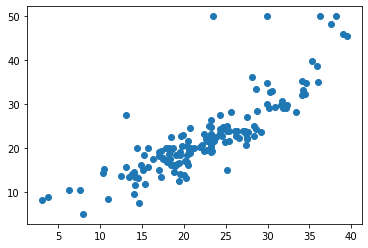

In [ ]:
plt.scatter(reg_pred,y_test)

Plot is linear which indicates the model has performed well.Now similarly lets create a distribution plot on residuals and before that let's find out the residuals.

In [ ]:
residuals=y_test-reg_pred
residuals

125   -1.812415
486   -0.392396
324   -0.134921
386    4.229048
459    1.814540
         ...   
84    -1.200352
307   -5.234188
173   -5.613348
56    -0.020948
431   -5.476800
Name: price, Length: 152, dtype: float64

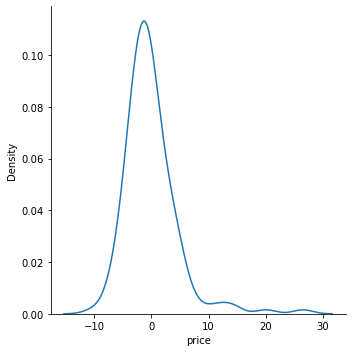

In [ ]:
sns.displot(residuals,kind='kde')

From the above plot it is evident that the residuals are normally distributed in the range [-10,10] except a very few outliers,can assume the model is doing a fair prediction.
Now lets create a scatter plot between residuals and predicted values.


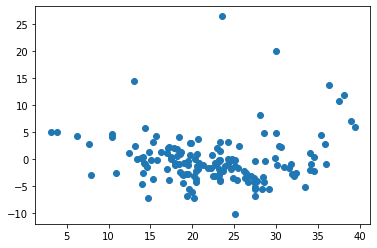

In [ ]:
plt.scatter(reg_pred,residuals)

In [ ]:
# there is no trend in the above plot and there is a randomness.Now lets use some metrics to evaluate the 
#model using the sklearn.metrics library.


In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
print(mean_squared_error(y_test,reg_pred))
print(mean_absolute_error(y_test,reg_pred))
print(np.sqrt(mean_squared_error(y_test,reg_pred)))

21.597209035018448
3.1175694194801027
4.647279745724207


#Rsquared and adjustedRsquared values are caculated 

In [ ]:
from sklearn.metrics import r2_score
score=r2_score(y_test,reg_pred)
score

0.7133593313710358

In [ ]:
adj_rsq=1-(1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
adj_rsq

0.6863569495436697

# New Data Prediction

In [ ]:
boston.data[0].shape

(13,)

In [ ]:
# convert the above dataset from 1D to 2D 
boston.data[0].reshape(1,-1)

array([[6.320e-03, 1.800e+01, 2.310e+00, 0.000e+00, 5.380e-01, 6.575e+00,
        6.520e+01, 4.090e+00, 1.000e+00, 2.960e+02, 1.530e+01, 3.969e+02,
        4.980e+00]])

In [ ]:
# scale the new test datapoint before prediction
scaler.transform(boston.data[0].reshape(1,-1))

C:\Users\harz1\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([[-0.42453495,  0.23432862, -1.27429225, -0.24470439, -0.15773227,
         0.3842372 , -0.0895507 ,  0.10562522, -0.98311486, -0.64740616,
        -1.34439097,  0.44130377, -1.04836079]])

In [ ]:
regression.predict(scaler.transform(boston.data[0].reshape(1,-1)))

C:\Users\harz1\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([29.73411353])

# Pickling the model file for deployment

In [ ]:
import pickle
pickle.dump(regression,open('regmodel.pkl','wb'))

In [ ]:
pickled_model = pickle.load(open('regmodel.pkl','rb'))

In [ ]:
#Prediction
pickled_model.predict(scaler.transform(boston.data[0].reshape(1,-1)))

C:\Users\harz1\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([29.73411353])